In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
wrld_df = pd.read_csv('world-happiness-report.csv')
wrld_df.shape

(1949, 11)

In [3]:
# display first five rows of dataframe
wrld_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
# check missing values
wrld_df.isna().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [5]:
# filling missing values with mean
cols_to_impute = ["Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices", "Generosity","Perceptions of corruption", "Positive affect", "Negative affect"]

imputer = SimpleImputer(strategy='mean')
for col in cols_to_impute:
    wrld_df[col] = imputer.fit_transform(wrld_df[[col]])

wrld_df.isna().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [6]:
wrld_df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [7]:
# features to use for clustering.

features = ['Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Positive affect', 'Negative affect']


In [8]:
# aggregate dataset to have unique records for each country
agg_wrd_df = wrld_df.groupby('Country name')[features].mean().reset_index()
agg_wrd_df

,Country name,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,0.508417,0.518167,0.070083,0.843333,0.548667,0.326500
1,Albania,0.716231,0.662923,-0.082692,0.869385,0.653846,0.299231
2,Algeria,0.804694,0.575014,-0.108224,0.705031,0.621125,0.263068
3,Angola,0.738250,0.456250,-0.088250,0.866750,0.613500,0.351250
4,Argentina,0.904400,0.768200,-0.159867,0.842067,0.833467,0.284000
...,...,...,...,...,...,...,...
161,Venezuela,0.910133,0.666400,-0.120372,0.795200,0.801800,0.260067
162,Vietnam,0.828039,0.852477,0.002436,0.773964,0.650000,0.211039
163,Yemen,0.739833,0.622417,-0.105149,0.805281,0.530500,0.293583
164,Zambia,0.737714,0.756786,0.013357,0.828857,0.720643,0.294357


In [9]:
# label ecoding for country names
countries = agg_wrd_df['Country name']
encoder = LabelEncoder()
countries_encoded = encoder.fit_transform(countries)

# reshape countries_encoeded
countries_encoded = countries_encoded.reshape(-1,1)

In [10]:
# normalizing (scaling )
# X = agg_wrd_df.select_dtypes(include=['float64'])
X = agg_wrd_df[['Social support','Freedom to make life choices', 'Generosity', 'Perceptions of corruption','Positive affect', 'Negative affect']]

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [12]:
# merging countries_encoded to X_scaled

happy_wrld = np.concatenate((X, countries_encoded), axis=1)

### KMeans Clustering

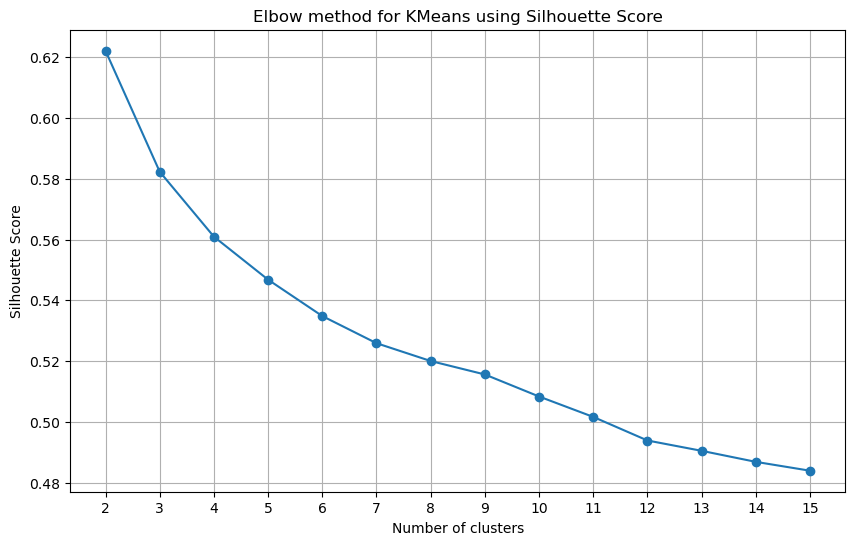

In [13]:
# silhouette score calculation

silhouette_scores = []
cluster_range = range(2, 16)

for n in cluster_range:
    kmeans = KMeans(n_clusters = n, random_state=42, n_init='auto')
    kmeans_labels = kmeans.fit_predict(happy_wrld)
    silhouette_scores.append(silhouette_score(happy_wrld, kmeans_labels))

# plot the scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')  # Plot all silhouette scores
plt.title('Elbow method for KMeans using Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 16, step=1))  # Adjust ticks for better visualization
plt.grid(True)
plt.show()

In [14]:
# Find the optimal number of clusters
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 as we started from 2 clusters
print("Optimal number of clusters:", optimal_clusters)

# KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(happy_wrld)

# Silhouette score for KMeans
kmeans_score = silhouette_score(happy_wrld, kmeans_labels)
print("Non-PCA KMeans Silhouette score:", kmeans_score)

Optimal number of clusters: 2
Non-PCA KMeans Silhouette score: 0.6221479580479675


In [15]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(happy_wrld)

# Create a DataFrame for the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,82.500177,-0.240895
1,81.500087,-0.158604
2,80.500056,-0.087169
3,79.500150,-0.275369
4,78.499983,-0.015117
...,...,...
161,-78.499986,-0.096170
162,-79.500024,-0.005398
163,-80.499877,-0.253292
164,-81.499955,-0.097755


In [16]:
# using PCA now...

# KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(pca_data)

# Silhouette score for KMeans
kmeans_score = silhouette_score(pca_data, kmeans_labels)
print("PCA KMeans Silhouette score:", kmeans_score)

PCA KMeans Silhouette score: 0.6221992330007606


### Agglomerative Clustrering

In [17]:
# Agglomerative Clustering with optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)
agglomerative_labels = agglomerative.fit_predict(happy_wrld)


# Silhouette score for Agglomerative Clustering
agglomerative_score = silhouette_score(happy_wrld, agglomerative_labels)
print("Non-PCA Agglomerative Clustering Silhouette score:", agglomerative_score)


Non-PCA Agglomerative Clustering Silhouette score: 0.6188679126995381


In [18]:
# with pca
# Agglomerative Clustering with optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_clusters)
agglomerative_labels = agglomerative.fit_predict(pca_data)


# Silhouette score for Agglomerative Clustering
agglomerative_score = silhouette_score(pca_data, agglomerative_labels)
print("PCA Agglomerative Clustering Silhouette score:", agglomerative_score)


PCA Agglomerative Clustering Silhouette score: 0.5974098952877818


In [19]:
# add cluster labels to original data
agg_wrd_df['cluster'] = kmeans_labels
agg_wrd_df

,Country name,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,cluster
0,Afghanistan,0.508417,0.518167,0.070083,0.843333,0.548667,0.326500,1
1,Albania,0.716231,0.662923,-0.082692,0.869385,0.653846,0.299231,1
2,Algeria,0.804694,0.575014,-0.108224,0.705031,0.621125,0.263068,1
3,Angola,0.738250,0.456250,-0.088250,0.866750,0.613500,0.351250,1
4,Argentina,0.904400,0.768200,-0.159867,0.842067,0.833467,0.284000,1
...,...,...,...,...,...,...,...,...
161,Venezuela,0.910133,0.666400,-0.120372,0.795200,0.801800,0.260067,0
162,Vietnam,0.828039,0.852477,0.002436,0.773964,0.650000,0.211039,0
163,Yemen,0.739833,0.622417,-0.105149,0.805281,0.530500,0.293583,0
164,Zambia,0.737714,0.756786,0.013357,0.828857,0.720643,0.294357,0


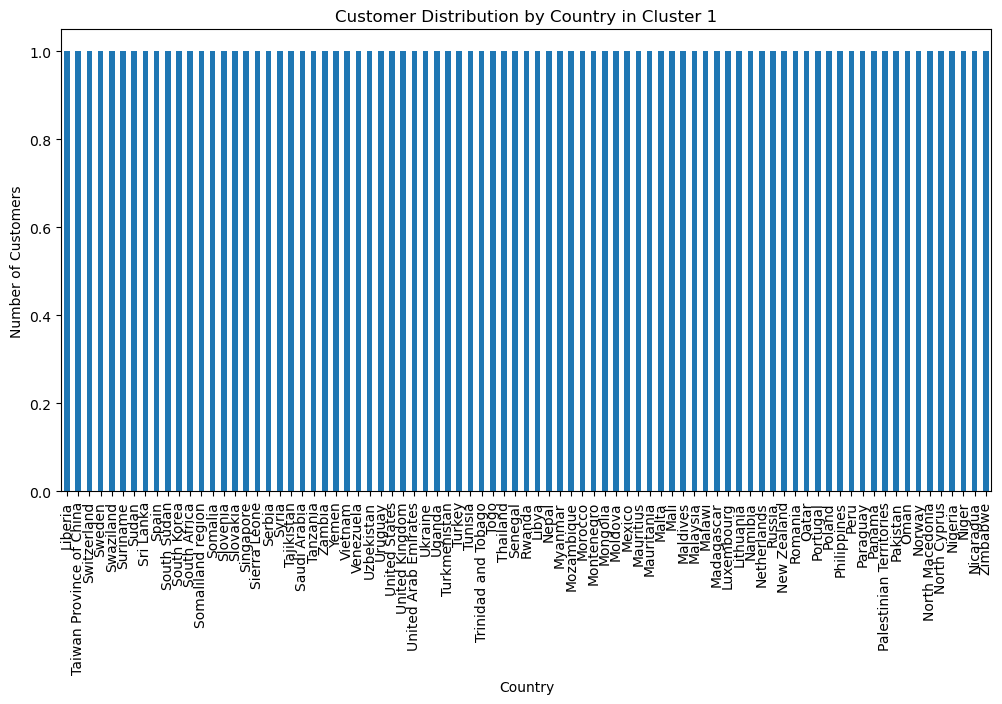

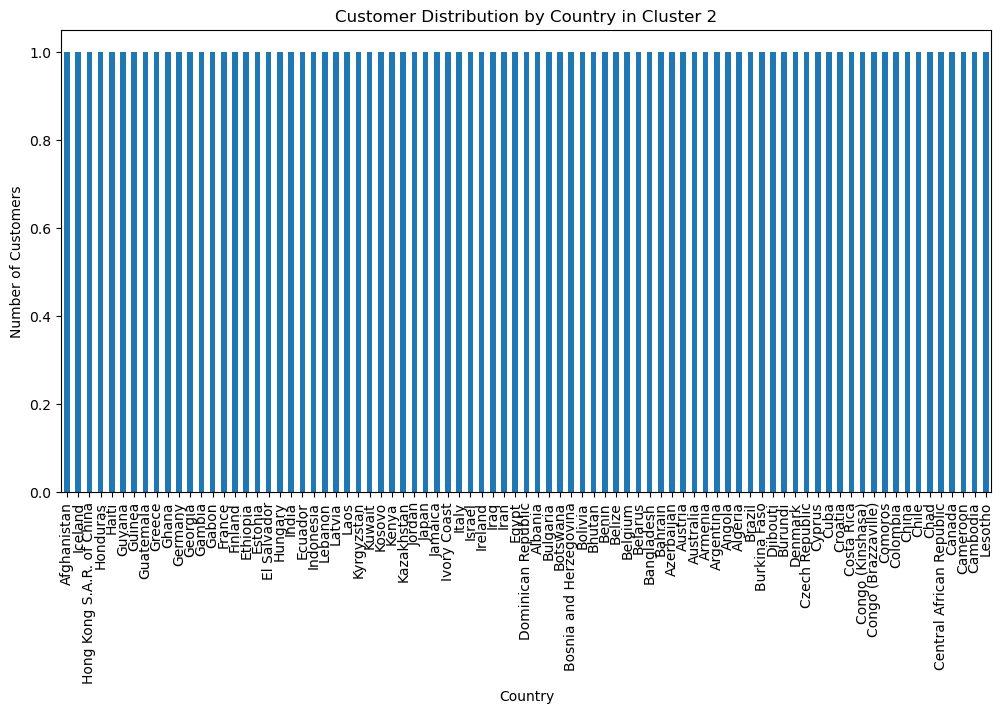

In [20]:
# Country distribution within each cluster
for cluster in range(optimal_clusters):
    cluster_data = agg_wrd_df[agg_wrd_df['cluster'] == cluster]
    country_counts = cluster_data['Country name'].value_counts()
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind='bar')
    plt.title(f'Customer Distribution by Country in Cluster {cluster + 1}')
    plt.xlabel('Country')
    plt.ylabel('Number of Customers')
    plt.show()